In [1]:
import os
os.chdir("../src")
print(os.getcwd())

import copy
import numpy as np
import math
import operator
import matplotlib.pyplot as plt

from poc.run_cts_agent import train_sac, train_her_sac
from poc.cts_vis_utils import visualize


%matplotlib inline
%load_ext autoreload
%autoreload 2

/u/clw4542/research/rl_ifo_mujoco/src


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages

## D-Shape on Pointworld


### Experiment Functions

In [2]:
# run experiments
base_path = "/scratch/cluster/clw4542/pointworld_results"

# expt_dict should be a dictionary of the following format: 
# {
#     "task_name": {"task_vars": list,
#                   "task_log_name": str,
#                  "train_fn": function,
#                  "expt_params": dict
#                  }
# }
def run_expts(expt_dict, n_runs=5):
    for expt_name, expt_settings in expt_dict.items():
        for run_id in range(n_runs):
            expt_settings["expt_params"]["run_id"] = run_id
            task_vars = expt_settings["task_vars"]
            task_log_name = expt_settings["task_log_name"]
            expt_params = expt_settings["expt_params"]
            train_fn = expt_settings["train_fn"]

            train_fn(task_vars, task_log_name, **expt_params)

### Small Env, Sparse Reward Experiments

Reward function: -1 until goal is reached, then reward of 0

In [ ]:
# Expt A: sparse reward results
global_sparse_exp_params = {
    "env_size": 1, 
    "goal": np.array([-0.4,  0.4]),
    "max_episode_steps": 100,
    "sparse_rew": True,
    "gradient_steps": 3
#     "rew_delay": 20
                }

# expt specifications
sparse_expt_dict = {
    "sac_sparse": {"task_vars": ["time_feat"],
            "task_log_name": "sac_sparse_n-step=3",
            "train_fn": train_sac,
            "expt_params": {**global_sparse_exp_params}
              },
    "pbrs_sparse": {"task_vars": ["time_feat",  "potential"],
             "task_log_name": "pbrs_sparse_n-step=3",
             "train_fn": train_sac,
             "expt_params": {**global_sparse_exp_params}
              },
    "state_aug_sparse": {"task_vars": ["time_feat", "state_aug"],
             "task_log_name": "state_aug_sparse_n-step=3",
             "train_fn": train_sac,
             "expt_params": {**global_sparse_exp_params}
              },
    "pbrs+state_aug_sparse": {"task_vars": ["time_feat", "her"],
               "task_log_name": "pbrs_state_aug_sparse_n-step=3",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params,
                               "n_sampled_goal": 0}
              },
    "dshape_sparse": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_sparse_n-goal=3_n-step=3",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params, 
                               "goal_sampling_strategy": "random",
                               "n_sampled_goal": 3}
              }
}

# run_expts(sparse_expt_dict, n_runs=5)

GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPA

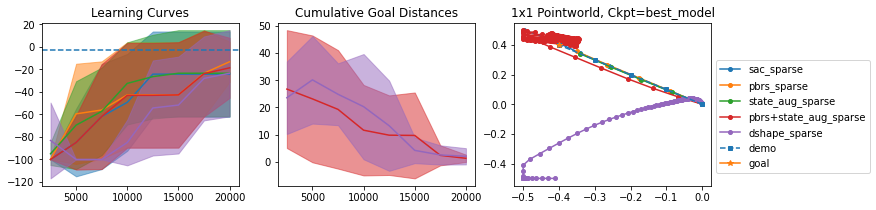

In [4]:
# visualize(base_path, sparse_expt_dict, run_ids=[2])
visualize(base_path, sparse_expt_dict, run_ids=[1, 2, 3, 4, 5])

GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPA

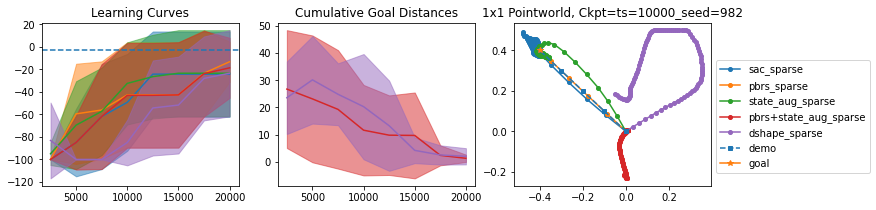

In [5]:
visualize(base_path, sparse_expt_dict, run_ids=[1, 2, 3, 4, 5], ckpt_name="ts=10000_seed=982")

In [ ]:
# Expt B: sensitivity to # goals
# expt specifications
goals_expt_dict = {
    "dshape_goals=1": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_n-goal=1_n-step=3_sparse",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params,
                              "goal_sampling_strategy": "random",
                              "n_sampled_goal": 1,
                              "gradient_steps": 3

                              }
              },
    "dshape_goals=2": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_n-goal=2_n-step=3_sparse",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params,
                               "goal_sampling_strategy": "random",
                               "n_sampled_goal": 2,
                               "gradient_steps": 3
                              }
              },
#     "dshape_goals=3": {"task_vars": ["time_feat", "her"],
#                "task_log_name": "dshape_n-step=3_sparse",
#                "train_fn": train_her_sac,
#                "expt_params": {**global_sparse_exp_params,
#                                "goal_sampling_strategy": "random",
#                                "n_sampled_goal": 3,
#                                "gradient_steps": 3
#                               }
#               },
    "dshape_goals=4": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_n-goal=4_n-step=3_sparse",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params,
                               "goal_sampling_strategy": "random",
                               "n_sampled_goal": 4,
                               "gradient_steps": 3
                              }
              },
}

run_expts(goals_expt_dict, n_runs=5)

GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.


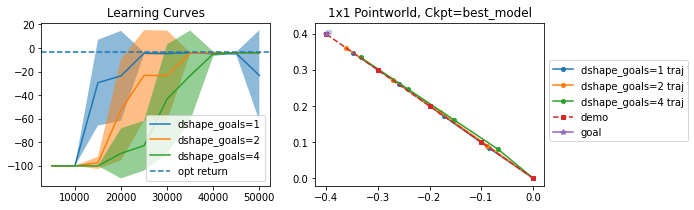

In [16]:
visualize(base_path, {**goals_expt_dict}, run_ids=[1, 2, 3, 4, 5])

/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.


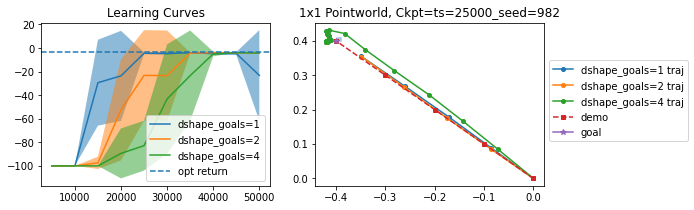

In [17]:
visualize(base_path, {**goals_expt_dict}, run_ids=[1, 2, 3, 4, 5], ckpt_name="ts=25000_seed=982")

In [19]:
# Expt C: Sensitivity to goal sampling strategy

# expt specifications
gss_expt_dict = {
    "dshape_gss=episode_nearest_future": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_gss=ep-nearest-future_sparse_n-step=3",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params,
                               "goal_sampling_strategy": "episode_nearest_future",
                               "n_sampled_goal": 3,
                               "gradient_steps": 3
                              }
              },
    "dshape_gss=demo_random": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_gss=demo-random_sparse_n-step=3",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params,
                               "goal_sampling_strategy": "demo_random",
                               "n_sampled_goal": 3,
                               "gradient_steps": 3
                              }
              },
#     "dshape_gss=episode_nearest": {"task_vars": ["time_feat", "her"],
#                "task_log_name": "dshape_gss=ep-nearest_sparse_n-step=3",
#                "train_fn": train_her_sac,
#                "expt_params": {**global_sparse_exp_params,
#                                "goal_sampling_strategy": "episode_nearest",
#                                "n_sampled_goal": 3,
#                                "gradient_steps": 3
#                               }
#               },
    "dshape_gss=episode": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_gss=episode_sparse_n-step=3",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params,
                              "goal_sampling_strategy": "episode",
                              "n_sampled_goal": 3,
                               "gradient_steps": 3
                              }
              },
#     "dshape_gss=future": {"task_vars": ["time_feat", "her"],
#                "task_log_name": "dshape_gss=future_sparse_n-step=3",
#                "train_fn": train_her_sac,
#                "expt_params": {**global_sparse_exp_params,
#                                "goal_sampling_strategy": "future",
#                                "n_sampled_goal": 3,
#                                "gradient_steps": 3
#                               }
#               },
    "dshape_gss=random": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_n-step=3_sparse",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params,
                               "goal_sampling_strategy": "random",
                               "n_sampled_goal": 3,
                               "gradient_steps": 3
                              }
              },
#     "dshape_gss=next-state-and-ep": {"task_vars": ["time_feat", "her"],
#                "task_log_name": "dshape_gss=next-state-and-ep_sparse_n-step=3",
#                "train_fn": train_her_sac,
#                "expt_params": {**global_sparse_exp_params,
#                                "goal_sampling_strategy": "next_state_and_ep",
#                                "n_sampled_goal": 3,
#                                "gradient_steps": 3
#                               }
#               }
}
# run_expts(gss_expt_dict, n_runs=5)

GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot b

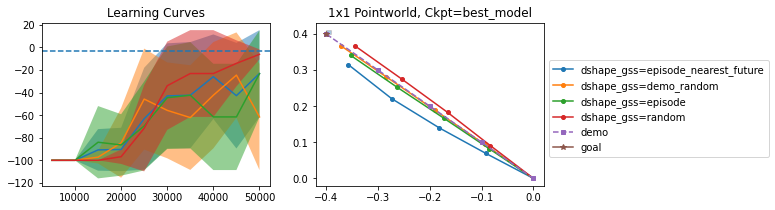

In [20]:
visualize(base_path, {**gss_expt_dict}, run_ids=[1, 2, 3, 4, 5])

GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot b

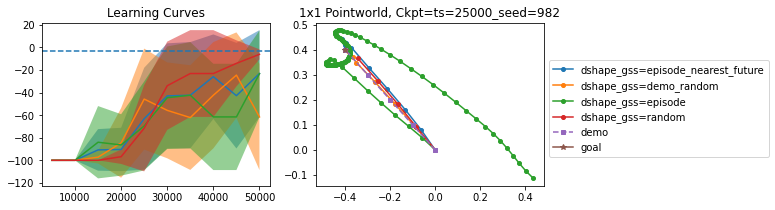

In [21]:
visualize(base_path, {**gss_expt_dict}, run_ids=[1, 2, 3, 4, 5], ckpt_name="ts=25000_seed=982")

In [50]:
# test effect of increasing the number of gradient steps per env interaction
# expt specifications
base_nstep_expt_dict = {
#     "sac_sparse": {"task_vars": ["time_feat"],
#             "task_log_name": "sac_sparse",
#             "train_fn": train_sac,
#             "expt_params": {**global_sparse_exp_params}
#               },
#     "pbrs+state_aug_sparse": {"task_vars": ["time_feat", "her"],
#                "task_log_name": "pbrs_state_aug_sparse",
#                "train_fn": train_her_sac,
#                "expt_params": {**global_sparse_exp_params,
#                                "n_sampled_goal": 0}
#               },
#     "dshape_sparse": {"task_vars": ["time_feat", "her"],
#                "task_log_name": "dshape_n-goal=3_sparse",
#                "train_fn": train_her_sac,
#                "expt_params": {**global_sparse_exp_params, 
#                                "goal_sampling_strategy": "random",
#                                "n_sampled_goal": 3}
#               }
}
    
nstep_expt_dict = {}
for expt_name, expt_settings in base_nstep_expt_dict.items():
    for gradient_steps in [1, 3, 6]: # 6
        nstep_expt_dict[f"{expt_name}_n-step={gradient_steps}"] = copy.deepcopy(expt_settings)
        
        nstep_expt_dict[f"{expt_name}_n-step={gradient_steps}"]["expt_params"]["gradient_steps"] = gradient_steps
        nstep_expt_dict[f"{expt_name}_n-step={gradient_steps}"]["task_log_name"] = f"{expt_settings['task_log_name']}_n-step={gradient_steps}"

# run_expts(nstep_expt_dict, n_runs=5)
# nstep_expt_dict

GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPA

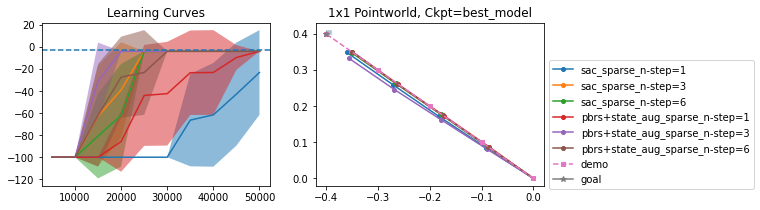

In [51]:
visualize(base_path, {**nstep_expt_dict}, run_ids=[1, 2, 3, 4, 5])

GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPA

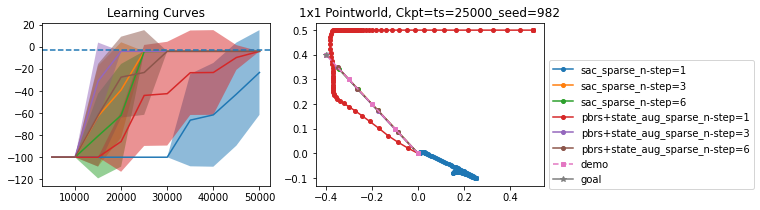

In [52]:
visualize(base_path, {**nstep_expt_dict}, run_ids=[1, 2, 3, 4, 5], ckpt_name="ts=25000_seed=982")

### Exploration Experiments

In [6]:
# Experiment: Testing effect of varying the entropy coefficient

# expt specifications
ent_coef_expt_dict = {
#     "sac_sparse_ent-coef=0": {"task_vars": ["time_feat"],
#             "task_log_name": "sac_sparse_ent-coef=0",
#             "train_fn": train_sac,
#             "expt_params": {**global_sparse_exp_params}
#               },
    "dshape_sparse_ent-coef=0": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_n-goal=3_sparse_ent-coef=0",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params, 
                               "goal_sampling_strategy": "random",
                               "n_sampled_goal": 3,
                               "ent_coef": 0
                              }
              },
    "dshape_sparse_ent-coef=0.2": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_sparse_n-goal=3_n-step=3",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params, 
                               "goal_sampling_strategy": "random",
                               "n_sampled_goal": 3,
                              }
              },
    "dshape_sparse_ent-coef=0.5": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_n-goal=3_sparse_ent-coef=0.5",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params, 
                               "goal_sampling_strategy": "random",
                               "n_sampled_goal": 3,
                               "ent_coef": 0.5
                              }
              }

}

# run_expts(ent_coef_expt_dict, n_runs=3)

GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.


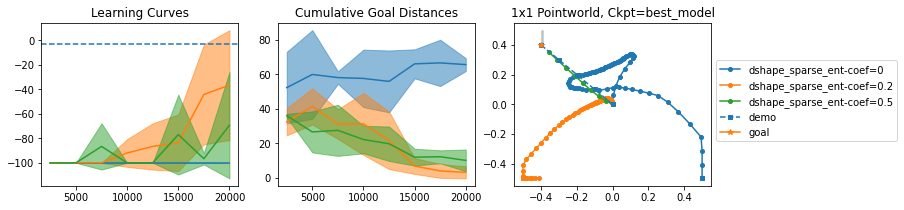

In [7]:
visualize(base_path, {**ent_coef_expt_dict}, run_ids=[1, 2, 3])

GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)


ValueError: Error: the file /scratch/cluster/clw4542/pointworld_results/dshape_sparse_n-goal=3_n-step=3/checkpoint/sac_pointworld_1/sac_pointworld/ts=1000_seed=982.zip could not be found

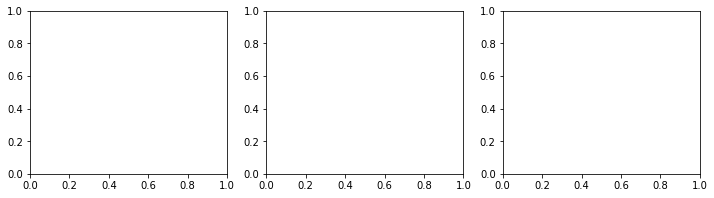

In [8]:
visualize(base_path, {**ent_coef_expt_dict}, run_ids=[1, 2, 3], ckpt_name="ts=1000_seed=982")

In [ ]:
# Experiment: Testing effect of turning off deterministic action selection
det_act_expt_dict = {
    "dshape_det-act=True": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_sparse_n-goal=3_n-step=3_det-pol=True",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params, 
                               "goal_sampling_strategy": "random",
                               "n_sampled_goal": 3,
                               "deterministic_policy": True
                              }
              },
    "dshape_det-act=True_entropy=0.1": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_sparse_n-goal=3_n-step=3_det-pol=True_ent-coef=0.1",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params, 
                               "goal_sampling_strategy": "random",
                               "n_sampled_goal": 3,
                               "deterministic_policy": True,
                               "ent_coef": 0.1
                              }
              },
    "dshape_det-act=True_entropy=0": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_sparse_n-goal=3_n-step=3_det-pol=True_ent-coef=0",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params, 
                               "goal_sampling_strategy": "random",
                               "n_sampled_goal": 3,
                               "deterministic_policy": True,
                               "ent_coef": 0
                              }
              },
    # baseline
    "dshape_det-act=False": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_sparse_n-goal=3_n-step=3",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params, 
                               "goal_sampling_strategy": "random",
                               "n_sampled_goal": 3,
                               "deterministic_policy": False
                              }
              }
}

run_expts(det_act_expt_dict, n_runs=5)

GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot b

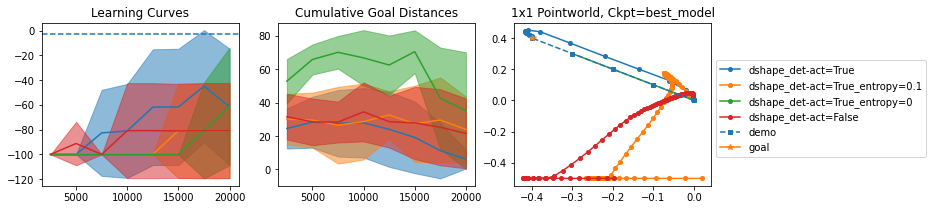

In [6]:
visualize(base_path, {**det_act_expt_dict}, run_ids=[1, 2, 3, 4, 5])

GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot b

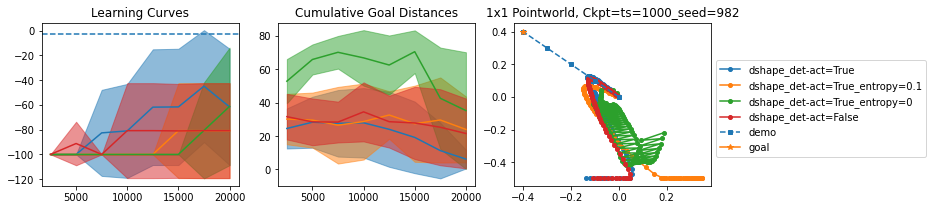

In [8]:
visualize(base_path, {**det_act_expt_dict}, run_ids=[1, 2, 3, 4, 5], ckpt_name="ts=1000_seed=982")

In [6]:
# Experiment: testing impact of setting reward base value = 0
rew_base_expt_dict = {
    # making rew-base 0 only
    "dshape_rew-base=0": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_sparse_n-goal=3_n-step=3_det-pol=False_rew-base=0",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params, 
                               "goal_sampling_strategy": "random",
                               "n_sampled_goal": 3,
                               "deterministic_policy": False,
                               "rew_base_value": 0
                              }
              },
    # test interaction with det policy
    "dshape_det-act=True_rew-base=0": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_sparse_n-goal=3_n-step=3_det-pol=True_rew-base=0",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params, 
                               "goal_sampling_strategy": "random",
                               "n_sampled_goal": 3,
                               "deterministic_policy": True,
                               "rew_base_value": 0
                              }
              },
    # test interaction with entropy 
    "dshape_det-act=False_ent-coef=0_rew-base=0": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_sparse_n-goal=3_n-step=3_det-pol=False-base=0_ent-coef=0",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params, 
                               "goal_sampling_strategy": "random",
                               "n_sampled_goal": 3,
                               "ent_coef": 0,
                               "deterministic_policy": False,
                               "rew_base_value": 0
                              }
              },
    # test all three together
    "dshape_det-act=True_ent-coef=0_rew-base=0": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_sparse_n-goal=3_n-step=3_det-pol=True-base=0_ent-coef=0",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params, 
                               "goal_sampling_strategy": "random",
                               "n_sampled_goal": 3,
                               "ent_coef": 0,
                               "deterministic_policy": True,
                               "rew_base_value": 0
                              }
              },

    
    # baseline
#     "dshape_rew-base=-1": {"task_vars": ["time_feat", "her"],
#                "task_log_name": "dshape_sparse_n-goal=3_n-step=3",
#                "train_fn": train_her_sac,
#                "expt_params": {**global_sparse_exp_params, 
#                                "goal_sampling_strategy": "random",
#                                "n_sampled_goal": 3,
#                               }
#               }
}

# run_expts(rew_base_expt_dict, n_runs=5)

DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.


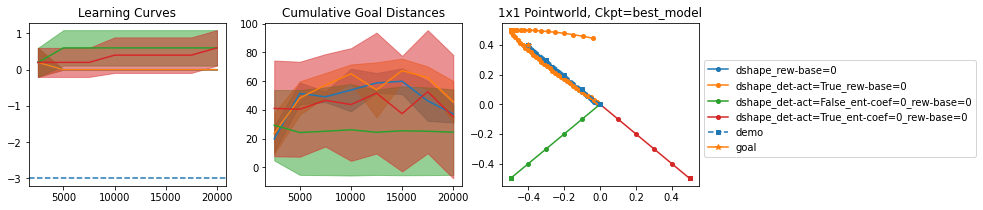

In [9]:
visualize(base_path, {**rew_base_expt_dict}, run_ids=[1, 2, 3, 4, 5])

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


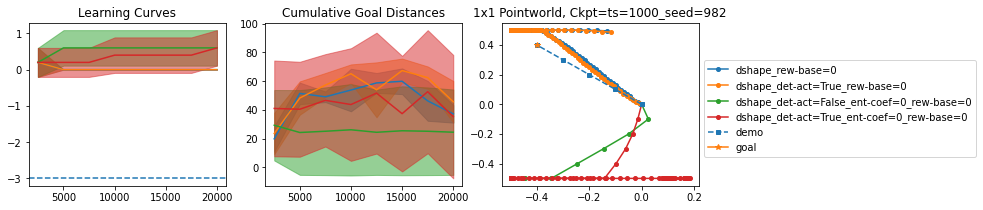

In [7]:
visualize(base_path, {**rew_base_expt_dict}, run_ids=[1, 2, 3, 4, 5], ckpt_name="ts=1000_seed=982")

### Large Environment, Sparse Reward

In [3]:
%env CUDA_VISIBLE_DEVICES=1

# Expt A: sparse reward results
global_sparse_exp_params = {
    "env_size": 2, # 3
    "goal": np.array([-0.75,  0.75]), # -1.2, 1.2
    "max_episode_steps": 150,
    "sparse_rew": True,
    "gradient_steps": 3
                }

# expt specifications
sparse_expt_dict = {
    "sac_sparse_env-size=2": {"task_vars": ["time_feat"],
            "task_log_name": "sac_sparse_env-size=2",
            "train_fn": train_sac,
            "expt_params": {**global_sparse_exp_params}
              },
    "dshape_sparse_env-size=2_gss=random": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_n-goal=3_sparse_env-size=2_gss=random",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params, 
                               "goal_sampling_strategy": "random",
                               "n_sampled_goal": 3,
                               "ent_coef": 0.0
                              }
              },
    "pbrs_sparse_env-size=2": {"task_vars": ["time_feat",  "potential"],
         "task_log_name": "pbrs_sparse_n-step=3_env-size=2",
         "train_fn": train_sac,
         "expt_params": {**global_sparse_exp_params}
          },
    "dshape_sparse_env-size=2_gss=random_entropy=0": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_n-goal=3_sparse_env-size=2_gss=random_entropy=0",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params, 
                               "goal_sampling_strategy": "random",
                               "n_sampled_goal": 3,
                               "ent_coef": 0.0,
                              }
              }
}

# run_expts(sparse_expt_dict, n_runs=5)

env: CUDA_VISIBLE_DEVICES=1


Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


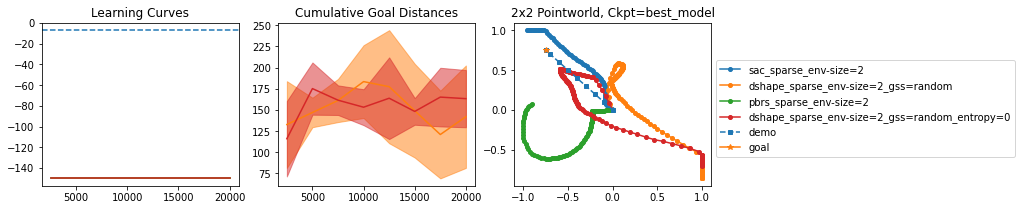

In [4]:
visualize(base_path, sparse_expt_dict, run_ids=[1, 2, 3, 4, 5])

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


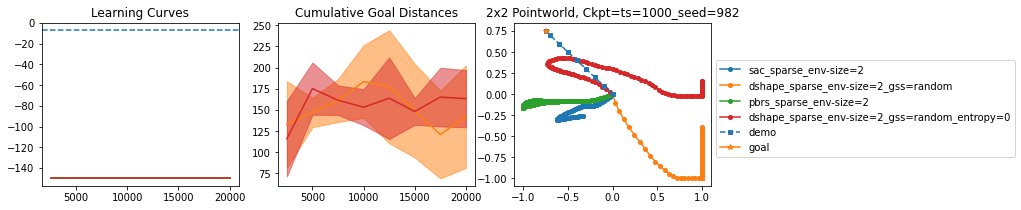

In [5]:
visualize(base_path, sparse_expt_dict, run_ids=[1, 2, 3, 4, 5], ckpt_name="ts=1000_seed=982")

In [7]:
# testing different goal sampling strategies
# expt specifications
goal_sampling_expt_dict = {
    "dshape_sparse_env-size=3_gss=random": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_n-goal=3_sparse_env-size=3_gss=random",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params, 
                               "goal_sampling_strategy": "random",
                               "n_sampled_goal": 3}
              },
    "dshape_sparse_env-size=3_gss=episode_nearest_future": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_n-goal=3_sparse_env-size=3_gss=episode_nearest_future",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params, 
                               "goal_sampling_strategy": "episode_nearest_future",
                               "n_sampled_goal": 3}
              },
    "dshape_sparse_env-size=3_gss=demo-random": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_n-goal=3_sparse_env-size=3_gss=demo-random",
               "train_fn": train_her_sac,
               "expt_params": {**global_sparse_exp_params, 
                               "goal_sampling_strategy": "demo_random",
                               "n_sampled_goal": 3}
              },
}

# run_expts(goal_sampling_expt_dict, n_runs=1)

GOAL IS  [-0.75  0.75]
STATE IS  [0. 0.]
OPT ACT IS  [-0.75  0.75]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (151, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.75  0.75]
STATE IS  [0. 0.]
OPT ACT IS  [-0.75  0.75]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (151, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.75  0.75]
STATE IS  [0. 0.]
OPT ACT IS  [-0.75  0.75]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (151, 3)
DEFINED REPLAY BUFFER OBS  AS  Box(6,)
Loading a model without an environment, this model cannot be trained until it has a valid environment.


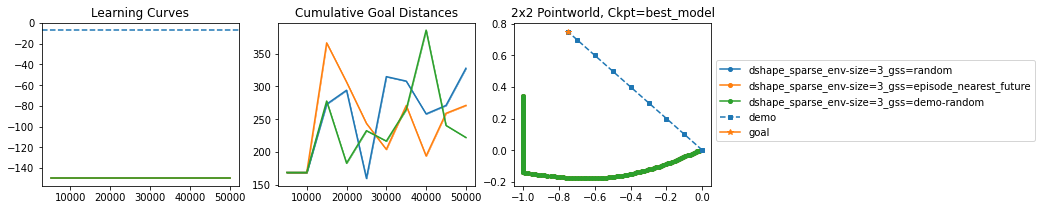

In [8]:
visualize(base_path, goal_sampling_expt_dict, run_ids=[1])

### Visualizing Trajectories from Trained Policy

TODOS: 
- make a video of training (done)


GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
GOAL IS  [-0.4  0.4]
STATE IS  [0. 0.]
OPT ACT IS  [-0.4  0.4]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
Loading a model without an environment, this model cannot be trained until it has a valid environment.


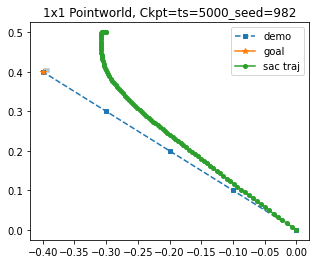

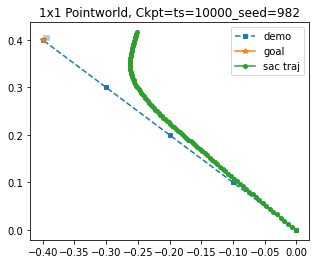

In [40]:
# visualize dshape training process
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
from IPython.utils import io

# expt specifications
expt_dict = {
    "sac": {"task_vars": ["time_feat"],
            "task_log_name": "sac",
            "train_fn": train_sac,
            "expt_params": {**global_exp_params}
              }
}

ckpt_list = ["ts=5000_seed=982",
             "ts=10000_seed=982",
#              "ts=15000_seed=982",
#              "ts=20000_seed=982",
#              "ts=25000_seed=982",
#              "ts=30000_seed=982",
#              "ts=35000_seed=982",
#              "ts=40000_seed=982",
#              "ts=45000_seed=982",
#              "ts=50000_seed=982",
            ]

duration = len(ckpt_list)
ckpt_list_copy = copy.deepcopy(ckpt_list)

def make_frame(t):
    fig = visualize(base_path, expt_dict, 
                    ckpt_name=ckpt_list_copy.pop(0),
                    plot_state_traj=True, 
                    plot_learning_curve=False, 
                    show=False, return_fig=True
                   )
    return mplfig_to_npimage(fig)

# creating animation
with io.capture_output() as captured:
    animation = VideoClip(make_frame, duration = duration - 1)

# displaying animation with auto play and looping
animation.ipython_display(fps = 1, loop = True, autoplay = True)
# animation.save_frame("test.png") # shows last frame by default???


### Dense Reward Experiments

In [30]:
global_exp_params = {"env_size": 1, 
                  "goal": np.array([-0.4,  0.4]),
                  "max_episode_steps": 100,
                  "sparse_rew": False
             }
# expt specifications
expt_dict = {
    "sac": {"task_vars": ["time_feat"],
            "task_log_name": "sac",
            "train_fn": train_sac,
            "expt_params": {**global_exp_params}
              },
    "pbrs": {"task_vars": ["time_feat", "potential"],
             "task_log_name": "pbrs",
             "train_fn": train_sac,
             "expt_params": {**global_exp_params}
              },
    "state_aug": {"task_vars": ["time_feat", "state_aug"],
             "task_log_name": "state_aug",
             "train_fn": train_sac,
             "expt_params": {**global_exp_params}
              },
    "pbrs+state_aug": {"task_vars": ["time_feat", "her"],
               "task_log_name": "pbrs_state_aug",
               "train_fn": train_her_sac,
               "expt_params": {**global_exp_params,
                               "n_sampled_goal": 0}
              },
    "dshape": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_n-goal=3",
               "train_fn": train_her_sac,
               "expt_params": {**global_exp_params,
                              "goal_sampling_strategy": "random",
                               "n_sampled_goal": 3}
              }
}

run_expts(expt_dict, n_runs=5)

/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


GOAL IS  [-0.9  0.9]
STATE IS  [0. 0.]
OPT ACT IS  [-0.9  0.9]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)
GOAL IS  [-0.9  0.9]
STATE IS  [0. 0.]
OPT ACT IS  [-0.9  0.9]
ACTION SPACE HIGH IS  [0.1 0.1]
DEMO SHAPE IS  (101, 3)


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Could not seed environment <PointWorld instance>
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<TimeFeatureWrapper<TimeLimit<PointWorld instance>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f271c7f8a58>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=5000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=10000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00


KeyboardInterrupt: 

In [ ]:
visualize(base_path, expt_dict)